# M2 | Exploration Notebook

In this notebook, you will do a first exploration of the data set that you will use for your project. One part of this exploration is guided, i.e. we will ask you to solve specific questions (task 1-3). The other part is open, i.e. we will ask you to come up with your own exploration ideas (task 4). 

Please upload your solved notebook to Moodle (under Milestone 2 Submission)adding your SCIPER number in title, example: m2-lernnavi-456392.ipynb


## Brief overview of Lernnavi
[Lernnavi](https://www.lernnavi.ch) is an instrument for promoting part of the basic technical study skills in German and mathematics.


For the guided part of the exploration we will focus on the three main tables:
* *users*: demographic information of users.
* *events*: events done by the users in the platform.
* *transactions*: question and answer solved by user.

### Users
* user_id: unique identifier of user in database.
* gender: only three values: M male, F female or missing (star). 
* canton: swiss canton.
* class_level: school year in swiss system.
* study: boolean variable. True if the student participated in the study.
* class_id: identifier of student’s class (only for the students in the experiment)


### Events
* event_id: unique identifier of event in database.
* user_id: user who peformed the event.
* event_date: timestamp of event.
* category: classification of action (task, general, statistics, etc).
* action: type of action performed.
* event_type: whether the students viewed or clicked in the event.
* transaction_token: used to link to transactions table.
* tracking_data: optional content associated to this event (e.g., the new points mastered for a topic).
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).

### Transactions
* transaction_id: unique identifier of transaction in database.
* transaction_token: used to link to events table.
* user_id: user who performed the transaction.
* document_id: document that was answered in transaction.
* document_version: version of document that was answered.
* evaluation: whether the user answered correctly or not. It is possible that it was only partially right. 
* input: answer the user gave.
* start_time: timestamp of when the user started answering.
* commit_time: timestamp of when the user submitted the answer.
* user_agent: the browser that the user used.
* solution: solution to question.
* type: type of question that was answered. 
* session_id: session during which the event took place.
* topic_id: the topics represent the taxonomy of categories shown in the Deutsch and Math dashboard. See topics_translated table.
* session_closed: whether the session has been finished (1: finished; 0: not finished).
* session_type: whether the session is a learn or level check (1: learn; 2: level check).
* session_accepted: whether the user finally accepted the result of the session (1: accepted; 0: refused).
* challenge: (boolean) whether the transaction was part of a challenge or not. Professors can create challenges containing different documents
* challenge_id: unique identifier of challenges. The same challenge can be done by multiple students. The pre-test and post-test in the study were designed like challenges.
* challenge_order: within the challenge, the order of the questions. The order matters because sometimes the questions were adapted depending on the student’s knowledge.
* challenge_name: name given to the challenges. 

## Useful Metadata Files
* [Data description](https://docs.google.com/document/d/1NPFNwi79JddrxZM-CpltH5nHro5btHRSNnYcAGj7Y0A/edit?usp=sharing)


In [1]:
# Import the tables of the data set as dataframes.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = './data' #You many change the directory


users = pd.read_csv('{}/users.csv.gz'.format(DATA_DIR))
events = pd.read_csv('{}/events.csv.gz'.format(DATA_DIR))
transactions = pd.read_csv('{}/transactions.csv.gz'.format(DATA_DIR))

## Task 1: Simple Statistics

In this task you are asked to do a first coarse exploration of the data set, using simple statistics and visualizations.

#### a) How many distinct participants do we have in the transactions table?


In [2]:
# We count the number of unique user_id in the transactions table
nb_user_in_trans = len(transactions['user_id'].unique())
print(nb_user_in_trans)

22470


#### b) How many transactions did each user do? Please provide a visualization and discuss the distribution.

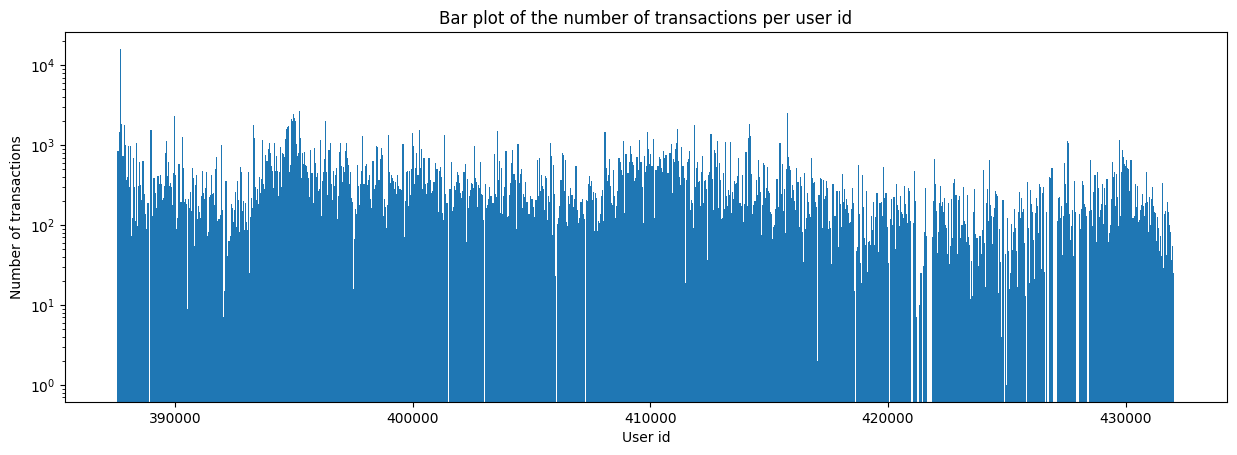

In [3]:
# We group by the user id to count the size of each group.
nb_trans_p_user = transactions.groupby('user_id').size()

# We plot it using a bar plot.
f = plt.figure()
plt.bar(nb_trans_p_user.keys(), nb_trans_p_user, log=True, width=50)
f.set_figwidth(15)
plt.title('Bar plot of the number of transactions per user id')
plt.xlabel('User id')
plt.ylabel('Number of transactions')
plt.show()

### Discussion
We see that the ids are not really well distributed, some user ids did not do any transaction. It may be because people created an account because of an order from the school or to test but never had the necessity to use it.

#### c) Which are the 8 most popular event actions? Please provide a visualization of the frequency of the top 8 event actions.

Hint: See actions in table events.

The eight more popular actions:
action
PAGE_VISIT              2113982
REVIEW_TASK             1734632
SUBMIT_ANSWER           1404142
NAVIGATE_DASHBOARD      1093791
NEXT                     907521
WINDOW_VISIBLE_FALSE     851634
WINDOW_VISIBLE_TRUE      705679
VIEW_QUESTION            451981
dtype: int64


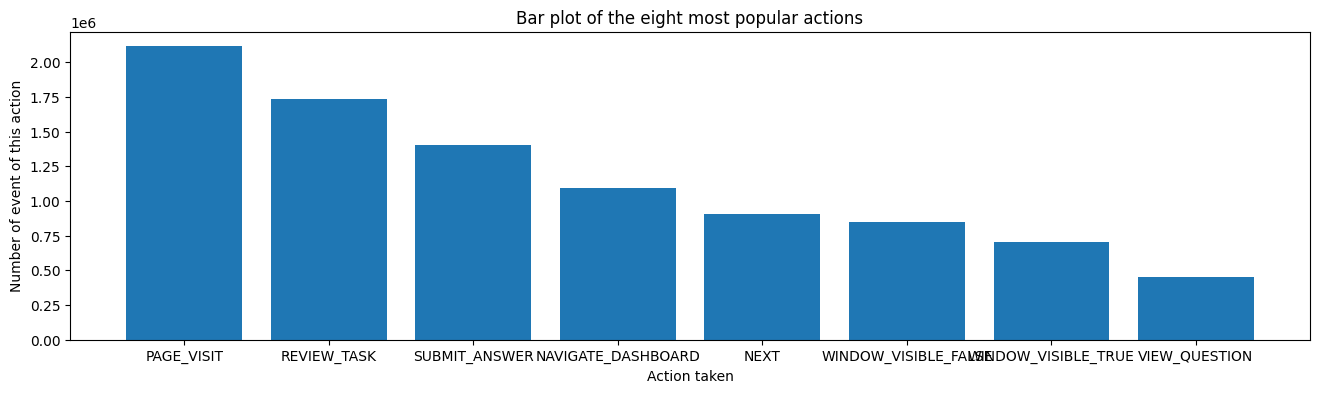

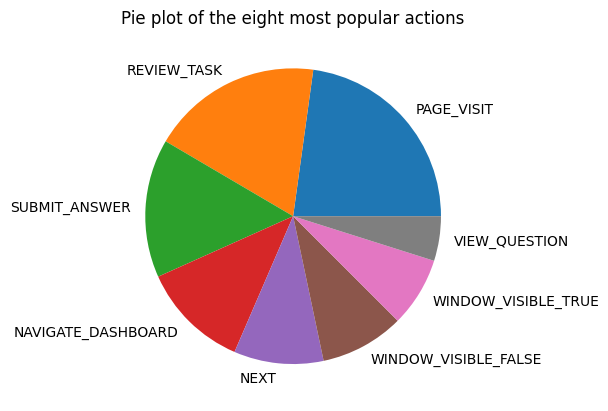

In [4]:
# We group the events table by action, count the number of elements for each group, sort the group and only take the 8 first elements.
eight_most_pop = events.groupby(['action']).size().sort_values(ascending=False)[:8]

print('The eight more popular actions:')
print(eight_most_pop)

# Let's set a great plot size
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)

# We plot the bar plot
plt.bar(eight_most_pop.keys(), eight_most_pop)
plt.title('Bar plot of the eight most popular actions')
plt.xlabel('Action taken')
plt.ylabel('Number of event of this action')
plt.show()

# Let's do a pie chart to see the distribution (Warning! It does not take into account the actions other than the eight first!)
plt.pie(eight_most_pop, labels=eight_most_pop.keys())
plt.title('Pie plot of the eight most popular actions')
plt.show()


## Discussion

The fact the PAGE_VISIT is the most popular action is not a surprise. People are often going back and forth through pages and URL changes happen quite often.
REVIEW_TASK and SUBMIT_ANSWER are the second and third most popular actions, which make sense since people are often reviewing and submitting questionnaires.

## Task 2: Static Analysis

In this second task, you will do a univariate an multivariate exploration of some aggregated features.

#### a) Build a data frame containing one row per user:

``[user_id, gender, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

In [5]:
# Let's first see what is the name of all the actions
print(events['action'].unique())

['VIEW_QUESTION' 'SUBMIT_ANSWER' 'NEXT' 'GO_TO_THEORY' 'SKIP' 'CLOSE'
 'VIEW_SESSION_END' 'REVIEW_TASK' 'GO_TO_BUG_REPORT' 'SHARE'
 'ACCEPT_PROGRESS' 'GO_TO_COMMENTS' 'REJECT_PROGRESS' 'NAVIGATE_DASHBOARD'
 'LOGIN' 'LOGOUT' 'REQUEST_HINT' 'PAGE_VISIT' 'WINDOW_OPEN'
 'WINDOW_VISIBLE_TRUE' 'WINDOW_VISIBLE_FALSE' 'WINDOW_CLOSE'
 'SELECT_STATISTICS' 'SUBMIT_SEARCH' 'GO_TO_SESSION' 'SHARE_SESSION'
 'OPEN_FEEDBACK' 'CLOSE_FEEDBACK' 'SURVEY_BANNER' 'PRETEST'
 'NAVIGATE_SURVEY']


In [6]:
# We only take the 'PAGE_VISIT' actions, group the DataFrame by user id and count the number of occurrences. (Warning! We count the number of pages visited, not the distinct number of pages!)
page_visited_per_user = events[events['action'] == 'PAGE_VISIT'][['user_id', 'action']].groupby('user_id').size().rename('num_pages_visited')
page_visited_per_user.head()

user_id
387604    1341
387605     862
387608     716
387613      37
387615     211
Name: num_pages_visited, dtype: int64

In [7]:
# We do the same with the 'OPEN_FEEDBACK' action
feedback_per_user = events[events['action'] == 'OPEN_FEEDBACK'][['user_id', 'action']].groupby('user_id').size().rename('num_feedback')
feedback_per_user.head()

user_id
387604    46
387605    78
387608    11
387615     1
387643    20
Name: num_feedback, dtype: int64

In [8]:
# To compute the percentage, we first drop the nans
corrected_df = transactions[['user_id', 'evaluation']].dropna(how='any')

# We compute the number of correct answers and all the numbers of answers for each user id
nb_correct = corrected_df[corrected_df['evaluation'] == 'CORRECT'].groupby(['user_id']).size().rename('correct')
nb_partial = corrected_df[corrected_df['evaluation'] == 'PARTIAL'].groupby(['user_id']).size().rename('partial')
nb_all = corrected_df.groupby('user_id').size().rename('all')

# Let's join and compute the ratio
percentage_correct = pd.merge(nb_correct, nb_partial, on='user_id', how='outer').join(nb_all, on='user_id', how='outer').set_index('user_id').fillna(0)
percentage_correct['percentage_correct'] = ((percentage_correct['correct']+0.5*percentage_correct['partial'])/percentage_correct['all'])

# We drop the old tables to free memory
del nb_correct
del nb_partial
del nb_all
del corrected_df

# We drop the useless columns
percentage_correct.drop('correct', axis=1, inplace=True)
percentage_correct.drop('partial', axis=1, inplace=True)
percentage_correct.drop('all', axis=1, inplace=True)

percentage_correct.head()

,percentage_correct
user_id,
387604,0.694444
387605,0.573529
387608,0.850877
387613,1.000000
387615,0.821429


In [9]:
# We do the same than PAGE_VISITED but for the CLICK event type
nb_clicks = events[events['event_type'] == 'CLICK'][['user_id', 'action']].groupby('user_id').size().rename('num_clicks')
nb_clicks.head()

user_id
387604    1408
387605     959
387608     516
387613      38
387615     109
Name: num_clicks, dtype: int64

In [10]:
# We combine all the dataframes to one
combined_df = users[['user_id', 'gender']].set_index('user_id').join(page_visited_per_user, on='user_id', how='outer').join(feedback_per_user, on='user_id', how='outer').join(percentage_correct, on='user_id', how='outer').join(nb_clicks, on='user_id', how='outer')

# Let's consider all Nan values of counts to 0 (since it is Nan because no entry was found) and cast the counts to int.
combined_df[['num_pages_visited', 'num_feedback', 'num_clicks']] = combined_df[['num_pages_visited', 'num_feedback', 'num_clicks']].fillna(0)
combined_df[['num_pages_visited', 'num_feedback', 'num_clicks']] = combined_df[['num_pages_visited', 'num_feedback', 'num_clicks']].astype(int)

# Free memory
del page_visited_per_user, feedback_per_user, percentage_correct, nb_clicks

combined_df.head()

,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks
user_id,,,,,
387604,NaN,1341,46,0.694444,1408
387605,NaN,862,78,0.573529,959
387608,NaN,716,11,0.850877,516
387613,NaN,37,0,1.000000,38
387615,MALE,211,1,0.821429,109


b) Perform a univariate analysis (including descriptive statistics and visualizations) for the five features (gender, num_pages_visited, num_feedback, percentage_correct, num_clicks) of your dataframe. Please check the lecture slides regarding information on how to perform a univariate analysis for categorical and numerical features. Discuss your results: how are the features distributed? Are there any anomalities?

In [11]:
# We can describe the form of the numerical values
combined_df.describe()

,num_pages_visited,num_feedback,percentage_correct,num_clicks
count,30929.000000,30929.000000,21433.000000,30929.000000
mean,68.349510,9.105758,0.655959,140.150700
std,121.530386,30.497469,0.147320,291.079366
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.583333,0.000000
50%,30.000000,0.000000,0.663043,48.000000
75%,81.000000,5.000000,0.743243,149.000000
max,3548.000000,647.000000,1.000000,6293.000000


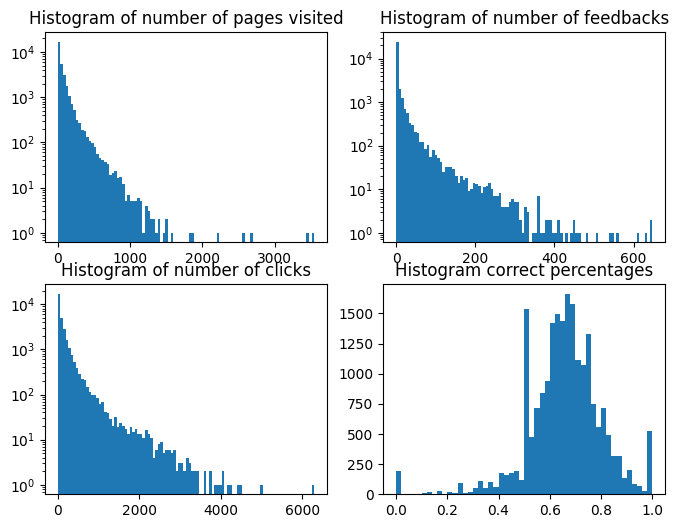

In [12]:
# Let's see all the distributions (apart of the genders for now)
fig, ax = plt.subplots(2, 2)

fig.set_figwidth(8)
fig.set_figheight(6)

ax[0,0].hist(combined_df['num_pages_visited'], bins=100, log=True)
ax[0,0].set_title('Histogram of number of pages visited')

ax[0,1].hist(combined_df['num_feedback'], bins=100, log=True)
ax[0,1].set_title('Histogram of number of feedbacks')

ax[1,0].hist(combined_df['num_clicks'], bins=100, log=True)
ax[1,0].set_title('Histogram of number of clicks')

ax[1,1].hist(combined_df['percentage_correct'], bins=50)
ax[1,1].set_title('Histogram correct percentages')
plt.show()

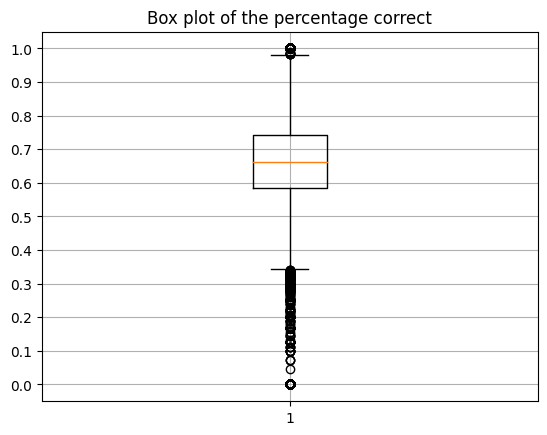

In [13]:
# A boxplot to see the percentage distribution better (Since the other variables follow a power law, a box plot is not really interesting)
plt.boxplot(combined_df['percentage_correct'].dropna())
plt.title('Box plot of the percentage correct')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid()
plt.show()

In [14]:
# For the categorical values, we need to add more steps (We change the Nans to 'NoData' since it can be interesting to see how much there are)
genders = combined_df['gender'].fillna('NoData').value_counts()
genders

gender
FEMALE    15342
MALE      10364
NoData     4217
STAR       1006
Name: count, dtype: int64

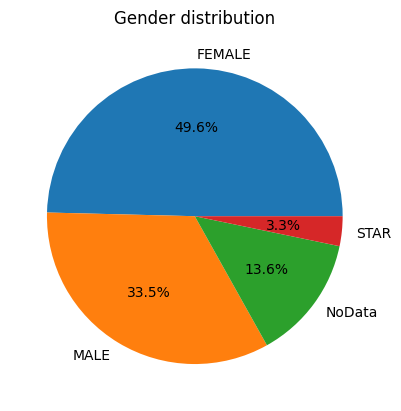

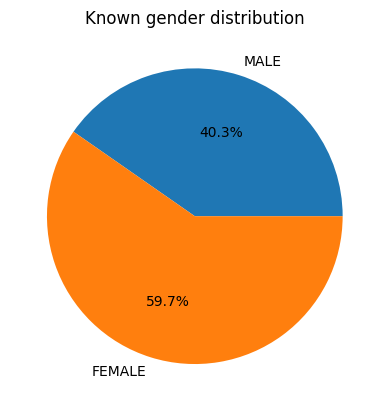

In [15]:
# Let's see a pie chart for the distribution on the genders
plt.pie(genders, labels=genders.keys(), autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()

# If we plot only the known ones
only_known = genders.loc[['MALE', 'FEMALE']]
plt.pie(only_known, labels=only_known.keys(), autopct='%1.1f%%')
plt.title('Known gender distribution')
plt.show()

#Free memory
del genders
del only_known

## Discussion

From this, we can do some interesting observations:
1. The counts (number of page visited, feedbacks and clicks) follow an exponential distribution. There are a lot of 0 but some of the users have some really high amounts.
2. The percentage of correct answers shows that the mean and median is around 66%. People are then correct two third of the time.
3. The genders are not uniformly distributed. There are sensibly more women than men. The explication is not clear but it may be because young women tend to be more serious and motivated than young men. Also, while there a little amount of non given genders (STAR), there are a big amount of not defined gender which can be a problem for data analysis.

c) Come up with two additional features on your own and add them to the dataframe. Please provide an explanation/description of your features as well as an argument/hypothesis of why you think these features are interesting to explore.

First, it would be really interesting to extract the operating system used.

In [16]:
# We first declare the function to split, get the OS and remove punctuation.
import string
def strip_os(row):
    # For each row, we take the correct column that we split.
    list_str = str(row['user_agent']).split()

    # If the len is >= 2, we take the second term which correspond to the OS. If there are no more than 1 element, it mean that is is either Nan or unknown
    if len(list_str) >= 2:
        ret_string = list_str[1]
    else:
        ret_string = list_str[0]

    # We remove punctuation
    return ''.join(filter(lambda char: char not in string.punctuation, ret_string))

# We take the wanted columns
agent_df = transactions[['user_id', 'user_agent']].copy()

# We watch how is this column
print(agent_df.head())

# We apply the function
agent_df['user_agent'] = agent_df.apply(strip_os, axis=1)

   user_id                                         user_agent
0   393211  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...
1   393211  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...
2   393211  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...
3   393211  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...
4   393211  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...


In [17]:
# To get the favorite OS, we need to get rid of 'nan' and 'unknown'
agent_df = agent_df[(agent_df['user_agent'] != 'nan') & (agent_df['user_agent'] != 'unknown')].copy()
# We then count the number of time the user used any OS
agent_df = agent_df.groupby(['user_id', 'user_agent']).size().rename('count')

In [18]:
# We take the max
agent_df = agent_df.reset_index().groupby(['user_id']).max()['user_agent']
agent_df.head()

user_id
387604    Windows
387605    Windows
387608     iPhone
387613    Windows
387615    Windows
Name: user_agent, dtype: object

In [19]:
# We are doing a left join because having a OS without anything else is not relevant
combined_df = combined_df.join(agent_df, on='user_id', how='left')

Secondly, we could extract the canton of the user.

In [20]:
cantons_df = users[['user_id', 'canton']].set_index('user_id')

In [21]:
cantons_df.head()

,canton
user_id,
387604,NaN
387605,NaN
387608,NaN
387613,NaN
387615,SG


In [22]:
# We are doing a left join because having a canton without anything else is not relevant
combined_df = combined_df.join(cantons_df, on='user_id', how='left')

# Free memory
del cantons_df

In [23]:
# We verify that all is OK
combined_df.head()

,gender,num_pages_visited,num_feedback,percentage_correct,num_clicks,user_agent,canton
user_id,,,,,,,
387604,NaN,1341,46,0.694444,1408,Windows,NaN
387605,NaN,862,78,0.573529,959,Windows,NaN
387608,NaN,716,11,0.850877,516,iPhone,NaN
387613,NaN,37,0,1.000000,38,Windows,NaN
387615,MALE,211,1,0.821429,109,Windows,SG


## Discussion
#### 1
The choice of the first feature can be explained by the fact that some believes make differences between the users of certain OSs. Apple OSs are generally seen to be very user friendly and costly. Linux is on the contrary very cheap but hard to use and not very user friendly. Windows is seen between those two. An interesting hypothesis would be that since Apple OSs are more user friendly, these users may have better grades in german (Since the programs provided gives more advantages to do good texts in german) but may have lower grades in mathematics (Since 'Geeks' tends to love maths and linux).

The feature 'user_agent' of the 'transactions' table gives the browser used by the user to do the transaction. Since the browser must be adapted for the OS, we can extract it.

#### 2
The second feature is straightforward but it could be very interesting to see the distribution of the students cantons. One could argue that swiss germans living far away from Germany (like Wallis) may have lower grades that those who are close to Germany (like Shaffausen). That is a great opportunity to verify that hypothesis!

The 'canton' feature is just composed of the acronym of the canton of the user.

d) Perform a univariate analysis of your features (including descriptive statistics and visualization). What can you observe? Do the results confirm your hypotheses?

In [24]:
# For the OS feature
os_counts = combined_df['user_agent'].value_counts()
os_counts

user_agent
Windows      12136
Macintosh     4071
iPhone        1638
Linux          286
iPad           207
X11             82
Android          8
Name: count, dtype: int64

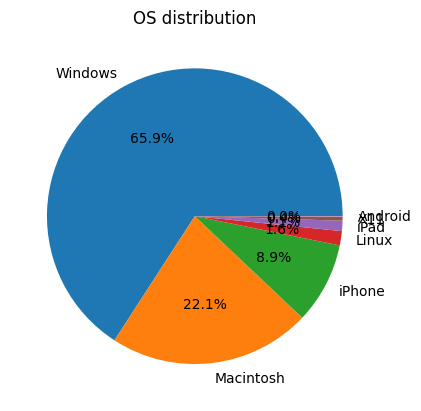

In [25]:
# Let's see a pie chart for the distribution on the OSs
plt.pie(os_counts, labels=os_counts.keys(), autopct='%1.1f%%')
plt.title('OS distribution')
plt.show()

In [26]:
cantons_count = combined_df['canton'].value_counts()
cantons_count

canton
ZH        6081
SG        5234
AG        3248
BL        2653
BS        2344
SO        2228
BE        1786
SZ        1320
SH         479
LU         333
AR         327
FL         268
Andere     237
FR          62
TG          34
ZG          24
GR          17
AI           6
GL           6
UR           5
JU           2
VD           2
NE           1
VS           1
Name: count, dtype: int64

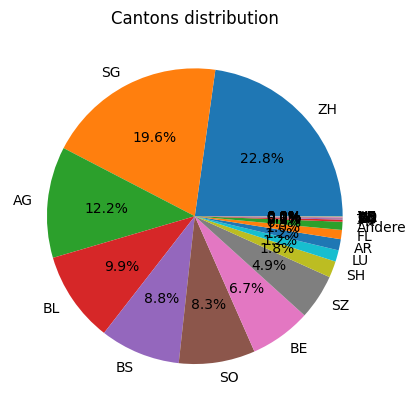

In [27]:
# Let's see a pie chart for the distribution on the OSs

plt.pie(cantons_count, labels=cantons_count.keys(), autopct='%1.1f%%')
plt.title('Cantons distribution')
plt.show()

## Discussion
#### 1
We can see some very interesting facts! The big majority is using Windows as OS. Apple is coming second with the OSs like Macintosh, Iphone OS and Ipad OS. Open source software are really not often used, since Linux, X11 and Android (semi-open...) seem to be pouted by students. It make sense since open source OSs are more of a computer scientists thing.

#### 2
There are no real surprises for the values of the cantons. Zurich have the most students which is normal since it is the most populated canton. Romands cantons do not use lernnavi, they are so almost excluded from the data. (Some are still in but it maybe because people may be bilingual and motivated or they do some tests to understand the site to do analysis on the data (-: )

The only not obvious thing is that Bern has a weirdly low amount of users. Since it is a swiss german the second most populated canton, that is a surprise. Maybe the canton just does not really want to use lernnavi or use another site.

e) Perform a multivariate analysis for two pairs of features of your choice. Please provide a metric and a visualization for both pairs. Please discuss: why did you choose these two pairs? What was your hypothesis? Do the results confirm your hypothesis?

We said earlier that maybe the people with open source OSs may have better grades in mathematics and people with Apple OSs may have better grades in german. Let's first see if there is a global influence of the OS on the grades.

In [28]:
# We can use the same hypothesis we saw before
percent_agent = combined_df[['percentage_correct', 'user_agent']].groupby(['user_agent']).mean().reset_index()
percent_agent.head()

,user_agent,percentage_correct
0,Android,0.748341
1,Linux,0.662167
2,Macintosh,0.664104
3,Windows,0.659872
4,X11,0.702081


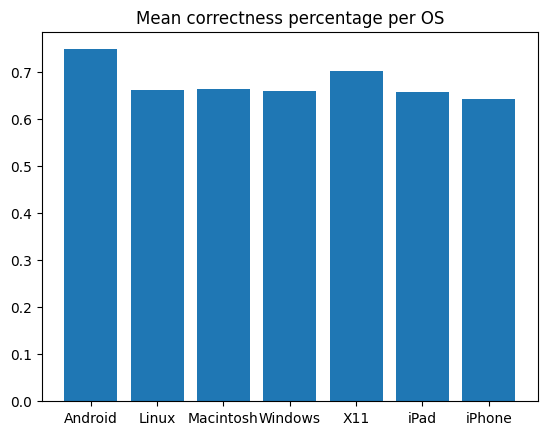

In [29]:
plt.bar(x=percent_agent['user_agent'], height=percent_agent['percentage_correct'])
plt.title('Mean correctness percentage per OS')
plt.show()

Then, we can do the same for the canton! Are there cantons with higher grade?

In [30]:
# We can use the same hypothesis we saw before
percent_canton = combined_df[['percentage_correct', 'canton']].groupby(['canton']).mean().reset_index()
percent_canton

,canton,percentage_correct
0,AG,0.664116
1,AI,0.620846
2,AR,0.665515
3,Andere,0.640348
4,BE,0.614352
5,BL,0.649665
6,BS,0.603866
7,FL,0.630713
8,FR,0.628918
9,GL,0.570477


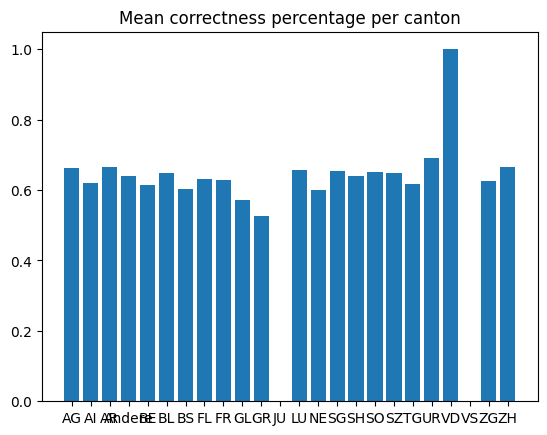

In [31]:
plt.bar(x=percent_canton['canton'], height=percent_canton['percentage_correct'])
plt.title('Mean correctness percentage per canton')
plt.show()

Since the last two multivariate analysis were a little bit disappointing and only involved one numeric and one categorical values, let's do a third.

If somebody clicks on a lot of things, it is likely that he/she visits a lot of pages. Let verify that!

In [32]:
clicks_pages = combined_df[['num_clicks', 'num_pages_visited']]

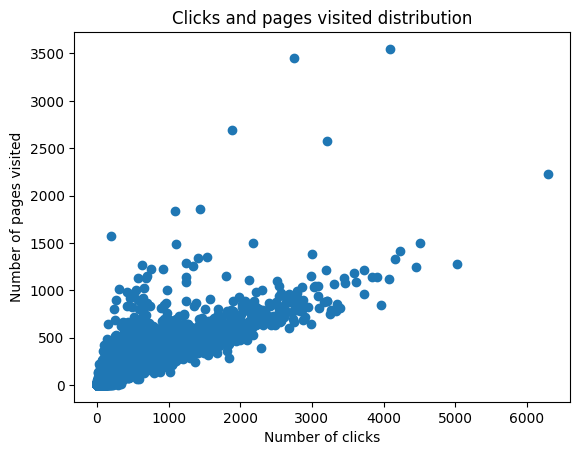

In [33]:
# Let's do a scatter plot to see what is going on
plt.scatter(clicks_pages['num_clicks'], clicks_pages['num_pages_visited'])
plt.xlabel('Number of clicks')
plt.ylabel('Number of pages visited')
plt.title('Clicks and pages visited distribution')
plt.show()

In [34]:
# We compute the Pearson correlation
clicks_pages.corr()

,num_clicks,num_pages_visited
num_clicks,1.000000,0.885325
num_pages_visited,0.885325,1.000000


In [35]:
# Free memory
del clicks_pages, percent_canton, percent_agent

## Discussion
#### 1
The first analysis is not really interesting... We do not see any notable values in the graph and the only one that may differ (Android) is not very representative since it is the preferred OS of only 8 people... We cannot conclude anything with this.

#### 2
The second analysis is not better... We can see that the Romand cantons does not have any percentages (Nan). It may confirm the hypothesis that states that Romand cantons only did tests. Apart from that, we cannot conclude anything on that.

#### 3
The third analysis is interesting, although obvious. In the scatter plot, we see a clear tendency of a positive linear correlation, which is approved by the high Pearson correlation score. We can say that the hypothesis is confirmed.

# Task 3: Time-Series Analysis

In the last task, you will perform a time-series analysis.


#### a) Build a data frame containing one row per user per week:

``[user_id, week, num_pages_visited, num_feedback, percentage_correct, num_clicks]``


The features are defined as follows:

- **num_pages_visited**: total number of pages a student visited 

- **num_feedback**: total number of times the student opened the feedback

- **percentage_correct**: number of correct answers/total number of answers (hint: evaluation = correct). If desired, you may assign a weight of 0.5 to partially correct answers. 

- **num_clicks**: total number of click events (hint: event_type = CLICK)

Where week 0 is the first week the specific user solved a task in the platform, i.e., the user's earliest entry in the transactions table.

Hint: You may extract the week of the year (dt.week) from the timestamps.

Hint 2: Be mindful that week 1 in 2022 is a different week from week 1 in 2023.

You can limit the number of weeks to 10, i.e. for each user we just look at the first 10 weeks of data.
You may change and justify your choice for the number of weeks.

### Explications
1. I decided to keep all weeks in the DataFrames since it could have been actions taken before the first transaction of a user and some behaviors can be very interesting to see at the very end or very beginning of the user's usage of the site.
2. I also decided to consider weeks as just 7 days and not taking into account the specific day of the week. For example, if a user did the first commit on a sunday, the next monday will still be in the 0th week and not the first one since only one day has passed. The first week will begin the next sunday, when 7 days will have passed.

In [36]:
transactions.head()

,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,...,type,session_id,topic_id,session_closed,session_type,session_accepted,challenge,challenge_id,challenge_order,challenge_name
0,688413,88fdcaad-f73b-46a2-b561-d262f2441442,393211,awd0i1DlVtg6kuMZSkpmHa,75002,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 07:58:27.312000000,2021-05-21 08:03:43.020000000,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,2.0,G3h – Training Rhetorik
1,688414,a75eb7b4-b2c2-47d4-9200-27980c175037,393211,arhWF3BT53V9W8cGOaZVPX,75012,PARTIAL,"{""type"": ""MULTI_COLOR_HIGHLIGHT"", ""highlighted...",2021-05-21 08:04:05.067000000,2021-05-21 08:07:21.288999936,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,MULTI_COLOR_HIGHLIGHT,NaN,NaN,NaN,NaN,NaN,True,1083.0,3.0,G3h – Training Rhetorik
2,688415,61eb829d-bdda-4107-86af-ad9a14a7bdc9,393211,9wk5dtV2mF59odW0wCEYYc,75003,PARTIAL,"{""type"": ""CLOZE_TEXT"", ""clozeInputs"": [""Person...",2021-05-21 08:07:37.048000000,2021-05-21 08:13:30.953999872,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,CLOZE_TEXT,NaN,NaN,NaN,NaN,NaN,True,1083.0,4.0,G3h – Training Rhetorik
3,688416,30ff0d8a-865d-460b-9177-b698a52b0d5c,393211,afilxZ8LycP5LReULeKngW,75009,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Ich gehe i...",2021-05-21 08:13:38.943000000,2021-05-21 08:22:13.975000064,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,5.0,G3h – Training Rhetorik
4,688417,0adedf3b-ba35-4497-8c6b-b5c2f6fcbbf3,393211,76m6v05NCeX8x2Wr5tKRE3,75007,CORRECT,"{""type"": ""DND_PAIRS"", ""input"": [""<p>Kleiner Ma...",2021-05-21 08:22:19.391000000,2021-05-21 08:22:55.366000128,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,...,DND_PAIRS,NaN,NaN,NaN,NaN,NaN,True,1083.0,6.0,G3h – Training Rhetorik


We first need to compute the first commit time of each user.

In [106]:
# We first need to compute the earliest date where each user solved a task
earliest_commit_time = transactions[['user_id', 'start_time']].copy()
earliest_commit_time['start_time'] = pd.to_datetime(earliest_commit_time['start_time'])
earliest_commit_time = earliest_commit_time.groupby('user_id').min().rename(columns = {'start_time': 'earliest_commit'})
earliest_commit_time.head()

,earliest_commit
user_id,
387604,2021-05-22 05:12:11.249
387605,2021-05-27 06:46:53.187
387608,2021-09-05 08:30:22.422
387613,2022-09-19 12:14:39.164
387615,2021-08-31 11:10:29.061


As the computation of the three 'num_*' columns are very similar, we can write a function.

In [107]:
def extract_week_from_event_action(action_type: str, column: str) -> pd.Series:
    # We do the same as in Task 2 but we take also the event date
    extracted_df = events[events[column] == action_type][['user_id', 'event_date']].set_index('user_id')

    # We convert the date string to a real date
    extracted_df['event_date'] = pd.to_datetime(extracted_df['event_date'])

    # We join the earliest commit time
    extracted_df = extracted_df.join(earliest_commit_time, on='user_id', how='left')

    # We compute the week
    extracted_df['week'] = (extracted_df['event_date'] - extracted_df['earliest_commit'])/np.timedelta64(1, 'W')

    # We can drop the useless columns
    extracted_df.drop('event_date', axis=1, inplace=True)
    extracted_df.drop('earliest_commit', axis=1, inplace=True)

    # Let's drop the nans (Otherwise, we cannot set week as index
    extracted_df.dropna(subset=['week'], inplace=True)

    # We round the week to the lower integer (since Day + 6 is still in the 0th week)
    extracted_df = extracted_df['week'].astype(int)

    # We group, count and return
    return extracted_df.reset_index().groupby(['user_id', 'week']).size().rename('num')

In [108]:
page_visited_per_user = extract_week_from_event_action('PAGE_VISIT', 'action').rename('num_pages_visited')
page_visited_per_user.head()

user_id  week
387604   10        3
         11        4
         12       23
         13       31
         14      122
Name: num_pages_visited, dtype: int64

In [83]:
feedback_per_user = extract_week_from_event_action('OPEN_FEEDBACK', 'action').rename('num_feedback')
feedback_per_user.head()

                     event_date         earliest_commit
user_id                                                
393980  2021-09-08 07:03:31.169 2021-08-19 07:27:15.490
393980  2021-09-08 07:03:33.646 2021-08-19 07:27:15.490
393980  2021-09-08 07:03:35.524 2021-08-19 07:27:15.490
393980  2021-09-08 07:04:46.476 2021-08-19 07:27:15.490
393982  2021-09-08 07:05:22.018 2021-08-19 07:28:59.862


user_id  week
387604   43       5
         44       5
         50       3
         64       2
         65      12
Name: num_feedback, dtype: int64

In [68]:
num_clicks = extract_week_from_event_action('CLICK', 'event_type').rename('num_clicks')
num_clicks.head()

                     event_date         earliest_commit
user_id                                                
393211  2021-05-21 07:58:18.912 2021-05-21 07:58:27.312
393211  2021-05-21 07:58:27.207 2021-05-21 07:58:27.312
393211  2021-05-21 08:03:42.588 2021-05-21 07:58:27.312
393211  2021-05-21 08:04:04.970 2021-05-21 07:58:27.312
393211  2021-05-21 08:07:20.331 2021-05-21 07:58:27.312


user_id  week
387604   4        4
         5       12
         10       6
         11       3
         12      23
Name: num_clicks, dtype: int64

The percentage is a little bit more tricky, since we have to compute the ratio in between

In [77]:
# Same as task 2 but with 'commit_time' (We take 'commit_time' as it is the time during which the answer was submitted)
percentage_correct = transactions[['user_id', 'evaluation', 'commit_time']].dropna(how='any')

# We convert the date string to a real date
percentage_correct['commit_time'] = pd.to_datetime(percentage_correct['commit_time'])

# We join the earliest commit time
percentage_correct = percentage_correct.join(earliest_commit_time, on='user_id', how='left')

# We compute the week
percentage_correct['week'] = (percentage_correct['commit_time'] - percentage_correct['earliest_commit'])/np.timedelta64(1, 'W')

# We can drop the useless columns
percentage_correct.drop('commit_time', axis=1, inplace=True)
percentage_correct.drop('earliest_commit', axis=1, inplace=True)

# We round the week to the lower integer (since Day + 6 is still in the 0th week)
percentage_correct['week'] = percentage_correct['week'].astype(int)

# We compute the number of correct answers and all the numbers of answers for each user id
nb_correct = percentage_correct[percentage_correct['evaluation'] == 'CORRECT'].groupby(['user_id', 'week']).size().rename('correct').astype(int)
nb_partial = percentage_correct[percentage_correct['evaluation'] == 'PARTIAL'].groupby(['user_id', 'week']).size().rename('partial').astype(int)
nb_all = percentage_correct.groupby(['user_id', 'week']).size().rename('all').astype(int)

# Let's join and compute the ratio
nb_df = pd.merge(nb_correct, nb_partial, on=['user_id', 'week'], how='outer').join(nb_all, on=['user_id', 'week'], how='outer').fillna(0)
nb_df['percentage_correct'] = ((nb_df['correct']+0.5*nb_df['partial'])/nb_df['all'])

# We drop the old tables to free memory
del nb_correct
del nb_partial
del nb_all

# We drop the useless columns
nb_df.drop('correct', axis=1, inplace=True)
nb_df.drop('partial', axis=1, inplace=True)
nb_df.drop('all', axis=1, inplace=True)
percentage_correct.drop('evaluation', axis=1, inplace=True)

# We then join the ratio to the base DataFrame
percentage_correct = percentage_correct.join(nb_df, on=['user_id', 'week'], how='outer')

# Let's drop the nans (Otherwise, we cannot set week as index and it propagates during the mean() of the evaluations)
percentage_correct = percentage_correct.dropna()

# We group by and count
percentage_correct = percentage_correct.groupby(['user_id', 'week']).mean()
percentage_correct.head()

percentage_correct
user_id week                    
387604  14                 0.000
        17                 0.125
        18                 0.750
        19                 0.500
        21                 0.500

In [78]:
# Now, we can combine the DataFrames
combined_week_df = pd.merge(page_visited_per_user, feedback_per_user, on=['user_id', 'week'], how='outer').join(percentage_correct, on=['user_id', 'week'], how='outer').join(num_clicks, on=['user_id', 'week'], how='outer')

# Let's consider all Nan values of counts to 0 (since it is Nan because no entry was found) and cast the counts to int.
combined_week_df[['num_pages_visited', 'num_feedback', 'num_clicks']] = combined_week_df[['num_pages_visited', 'num_feedback', 'num_clicks']].fillna(0)
combined_week_df[['num_pages_visited', 'num_feedback', 'num_clicks']] = combined_week_df[['num_pages_visited', 'num_feedback', 'num_clicks']].astype(int)

combined_week_df.head()

NameError: name 'page_visited_per_user' is not defined

In [71]:
# Free memory
del page_visited_per_user, feedback_per_user, percentage_correct, num_clicks

#### b) Select two features and analyze their behavior over time. Please provide a hypothesis and visualization for both features. For ideas on how to perform a time series exploration, please check the lecture slides and notebook. Discuss your results: what do you observe? Do the results confirm your hypotheses?

#### Hypothesis
The two features chosen are 'num_pages_visited' and 'percentage_correct'.
1. 'num_pages_visited': It would make sense that the motivation of the student are dropping through the year so the number of pages visited should decrease over time.
2. 'percentage_correct': Even if the motivation is decreasing, the students must become better and better on the topic they see so the grades must increase over time.

In [79]:
# Let's describe the number of pages visited
combined_week_df.reset_index().groupby('week')['num_pages_visited'].sum().describe()

count       156.000000
mean      13551.166667
std       55628.914206
min           0.000000
25%          49.500000
50%        1982.500000
75%        9858.250000
max      670502.000000
Name: num_pages_visited, dtype: float64

In [73]:
# And the percentage
combined_week_df.reset_index().groupby('week')['percentage_correct'].mean().describe()

count    89.000000
mean      0.662076
std       0.053061
min       0.595861
25%       0.640114
50%       0.651931
75%       0.665525
max       1.000000
Name: percentage_correct, dtype: float64

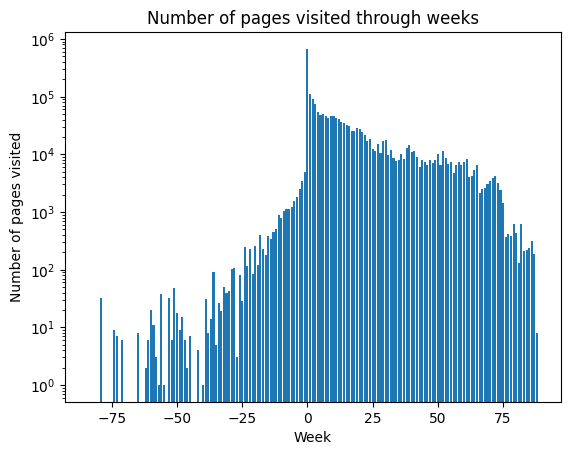

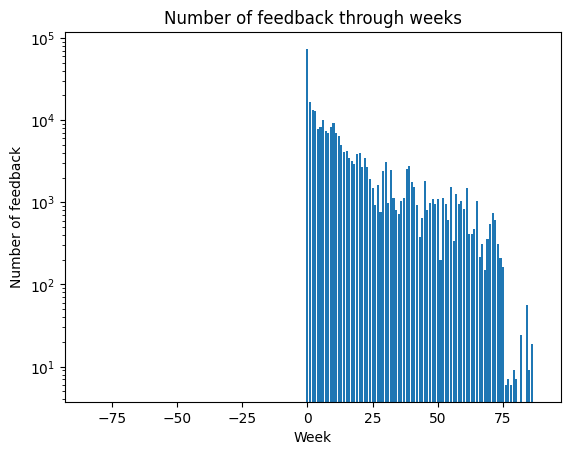

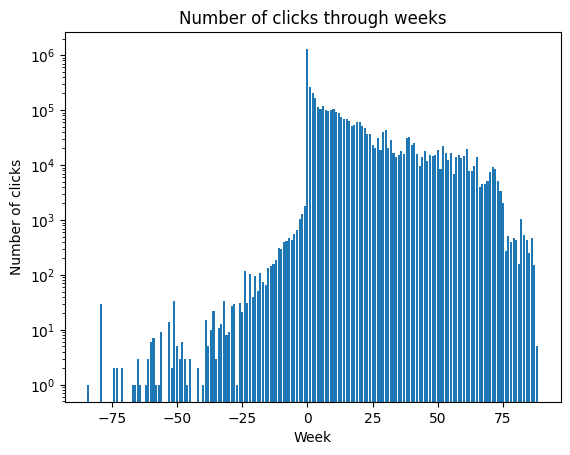

In [74]:
# The three 'num_*' columns are very similar, so let's just plot the three
for column_name in ['num_pages_visited', 'num_feedback', 'num_clicks']:
    sum_pages_per_week = combined_week_df.reset_index()[['week', column_name]].groupby('week').sum()
    plt.bar(sum_pages_per_week.index, sum_pages_per_week[column_name], log=True)
    refactored_name = column_name.replace('_', ' ').replace('num', 'Number of')
    plt.title(f"{refactored_name} through weeks")
    plt.xlabel('Week')
    plt.ylabel(refactored_name)
    plt.show()

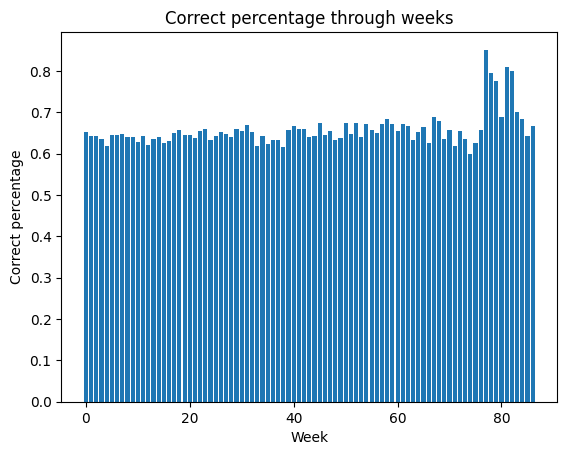

In [48]:
# Finally, let's plot the mean percentage over users.
mean_percentage_per_week = combined_week_df.reset_index()[['week', 'percentage_correct']].groupby('week').mean()
plt.bar(mean_percentage_per_week.index, mean_percentage_per_week['percentage_correct'])
plt.title('Correct percentage through weeks')
plt.xlabel('Week')
plt.ylabel('Correct percentage')
plt.show()

### Discussion
#### num_pages_visited
The first interesting thing we can see is that the number of pages visited through weeks has a really high STD. It makes sense since we can expect some weeks to have a really low value (for example weeks before the first commit) and some have really high values (just after the first commit) (This may be a downgrade about keeping all weeks).
On the plot, we see a gradual increase of the number of page visited before the first commit and then an explosion on the week of the first commit followed by a big drop afterward. This can be explained by the fact that before the first commit, only teachers or really motivated students go to test the site. Then the first commit is most likely mandatory which is why there is a big explosion of the number of commits the first week. Then the interest is most likely gradually decreasing through the weeks.

(PS: We see that there can be clicks or page visits before the first commit, but no feedback. It makes sense since we can only do a feedback after having commited something)

We can therefore partially accept the hypothesis (the number is increasing before but decreasing after)
#### percentage_correct
The describe method os not really interesting on the percentage_correct column. However, it is fascinating to analyse the plot. We see that the percentage correct is stable through the weeks, but have a little peak at the end. This could be explained by the fact that new topics are continuously taught so the grade are stable through the year but during the revisions, people are getting better and better everywhere. However, we have to keep in mind that some other variables can enter into account. For example, after the 80th week, only a few people are doing something on the site which could also explain the behavior of the plot.

Therefore, I think we can refuse the hypothesis. (The percentage is not gradually increasing).


# Task 4: Creative extension 

Please provide **one** new hypothesis you would like to explore with the data and provide a visualization for it. Discuss your results: what do you observe? Do the results confirm your hypotheses?



#### Hypothesis
It would be interesting to see the evolution over time of grade of users of different OSs. It is quite difficult to make an hypothesis on that but we could suppose that Apple OSs users may keep a better grade through weeks than Linux users because the user-friendly applications are more convenient. Windows users should lie in between.

In [49]:
# We need to first join the agent dataframe to our main temporal one
combined_agent_week_df = combined_week_df.join(agent_df, on='user_id', how='left')
combined_agent_week_df.head()

num_pages_visited  num_feedback  percentage_correct  num_clicks  \
user_id week                                                                    
387604  -1                    0             0                 NaN           4   
         0                    0             0                 NaN          12   
         5                    7             0                 NaN           9   
         6                   23             0                 NaN          23   
         7                   31             0                 NaN          29   

             user_agent  
user_id week             
387604  -1      Windows  
         0      Windows  
         5      Windows  
         6      Windows  
         7      Windows

In [50]:
# Let's only take the wanted columns and compute the mean over the users by agent
combined_agent_week_df = combined_agent_week_df.reset_index()[['week', 'user_agent', 'percentage_correct']].groupby(['user_agent', 'week']).mean()
combined_agent_week_df = combined_agent_week_df.reset_index()

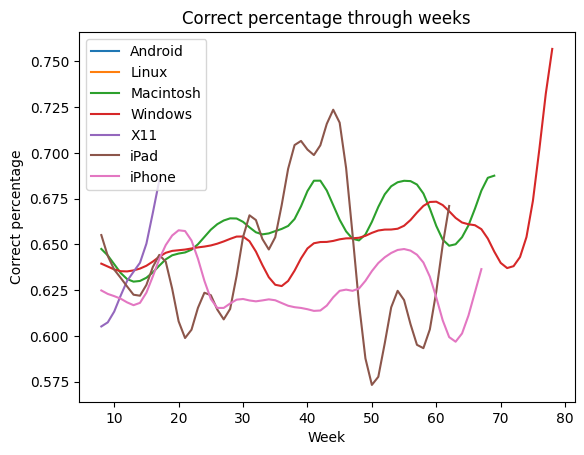

In [51]:
from scipy.ndimage import gaussian_filter1d
for agent in combined_agent_week_df['user_agent'].unique():

    # We take the corresponding agent
    current_df = combined_agent_week_df[combined_agent_week_df['user_agent'] == agent][['week', 'percentage_correct']]

    # We smooth the graph, otherwise it is un readable
    ysmoothed = gaussian_filter1d(current_df.percentage_correct, sigma=2)

    # We plot it
    plt.plot(current_df.week, ysmoothed, label=agent)

plt.title('Correct percentage through weeks')
plt.xlabel('Week')
plt.ylabel('Correct percentage')
plt.legend(loc='upper left')
plt.show()

#### Discussion
We can see from the graph multiple interesting fact:
1. First, the Android and Linux graphs are absent, since there are not enough weeks with data in order to make a correct smoothing.
2. There is no clear differences between Windows and Macintosh users...
3. However, we see a big difference with the iPhone users. They have quite lower grades than the others and tend to gradually do worse through weeks. That could be explained that students doing their homework on their phones are not as motivated as the others.
4. The iPad curve is very unstable. This is surely because their number is low.

From these observations, we can deny our hypothesis since there are no real differences between Apple OSs and Windows users. However, students doing their homework on their phone tend to have lower grades than the others.